In [1]:
!pip install kaggle

In [2]:
!kaggle datasets download -d esmanurdeli/scooby-doo-classification-dataset

Dataset URL: https://www.kaggle.com/datasets/esmanurdeli/scooby-doo-classification-dataset
License(s): CC0-1.0
scooby-doo-classification-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
import zipfile

# Define the path to the downloaded zip file
zip_file = 'scooby-doo-classification-dataset.zip'  # Update filename if necessary
output_dir = 'scooby-doo-classification-dataset/'

# Unzip the file
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(output_dir)

print(f"Dataset extracted to: {output_dir}")

Dataset extracted to: scooby-doo-classification-dataset/


In [4]:
import os

# List the files in the extracted directory
dataset_dir = 'scooby-doo-classification-dataset/'
dataset_files = os.listdir(dataset_dir)

# Print the first few files in the dataset
print(dataset_files[:5])

['dataset']


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# TensorFlow for deep learning
import tensorflow as tf

# Sklearn for machine learning and evaluation metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction import image

# OpenCV for image processing
import cv2

# Utilities for file and directory management
from glob import glob
from pathlib import Path
from collections import Counter
import os
import shutil
import traceback

In [14]:
for dirname, _, filenames in os.walk(dataset_dir):
    for filename in filenames:
        print(os.path.join(dirname, filename))      

scooby-doo-classification-dataset/dataset\Daphne\daphne_1.jpeg
scooby-doo-classification-dataset/dataset\Daphne\daphne_10.jpeg
scooby-doo-classification-dataset/dataset\Daphne\daphne_11.jpeg
scooby-doo-classification-dataset/dataset\Daphne\daphne_12.jpeg
scooby-doo-classification-dataset/dataset\Daphne\daphne_13.jpeg
scooby-doo-classification-dataset/dataset\Daphne\daphne_14.jpeg
scooby-doo-classification-dataset/dataset\Daphne\daphne_15.jpeg
scooby-doo-classification-dataset/dataset\Daphne\daphne_16.jpeg
scooby-doo-classification-dataset/dataset\Daphne\daphne_17.jpeg
scooby-doo-classification-dataset/dataset\Daphne\daphne_18.jpeg
scooby-doo-classification-dataset/dataset\Daphne\daphne_19.jpeg
scooby-doo-classification-dataset/dataset\Daphne\daphne_2.jpeg
scooby-doo-classification-dataset/dataset\Daphne\daphne_20.jpeg
scooby-doo-classification-dataset/dataset\Daphne\daphne_21.jpeg
scooby-doo-classification-dataset/dataset\Daphne\daphne_22.jpeg
scooby-doo-classification-dataset/dataset\

In [10]:
import glob
d_paths = glob.glob(os.path.join(dataset_dir, 'dataset', '*'))
d_paths = [path.replace("\\", "/") for path in d_paths]
d_paths

['scooby-doo-classification-dataset/dataset/Daphne',
 'scooby-doo-classification-dataset/dataset/Fred',
 'scooby-doo-classification-dataset/dataset/Scooby',
 'scooby-doo-classification-dataset/dataset/Shaggy',
 'scooby-doo-classification-dataset/dataset/Velma']

In [11]:
classes = [os.path.basename(cls) for cls in d_paths]
print(f"Classes: {classes}")

Classes: ['Daphne', 'Fred', 'Scooby', 'Shaggy', 'Velma']


In [21]:
import os
import cv2
from collections import Counter
import glob

def check_image_sizes(input_dir):
    size_counter = Counter()

    # Use glob to get all image paths
    d_paths = glob.glob(os.path.join(input_dir, 'dataset', '**', '*'), recursive=True)
    
    # Convert any backslashes to forward slashes for consistency
    d_paths = [path.replace("\\", "/") for path in d_paths]

    # Loop through each file in the paths
    for img_path in d_paths:
        if img_path.lower().endswith(('.jpg', '.jpeg', '.png')):  # Only process image files
            print(f"Reading image: {img_path}")  # Debugging line to check which files are being processed
            image = cv2.imread(img_path)

            if image is None:
                print(f"Warning: {img_path} could not be read, skipping.")
                continue
            size_counter[image.shape[:2]] += 1
        else:
            print(f"Skipping non-image file: {img_path}")  # Debugging non-image files

    return size_counter

In [22]:
input_directory=dataset_dir
output_directory = '/data_new' 

sizes = check_image_sizes(input_directory)
print("distribution of image size :")
for size, count in sizes.items():
    print(f"Size: {size}, Count: {count}")

Skipping non-image file: scooby-doo-classification-dataset/dataset/Daphne
Skipping non-image file: scooby-doo-classification-dataset/dataset/Fred
Skipping non-image file: scooby-doo-classification-dataset/dataset/Scooby
Skipping non-image file: scooby-doo-classification-dataset/dataset/Shaggy
Skipping non-image file: scooby-doo-classification-dataset/dataset/Velma
Reading image: scooby-doo-classification-dataset/dataset/Daphne/daphne_1.jpeg
Reading image: scooby-doo-classification-dataset/dataset/Daphne/daphne_10.jpeg
Reading image: scooby-doo-classification-dataset/dataset/Daphne/daphne_11.jpeg
Reading image: scooby-doo-classification-dataset/dataset/Daphne/daphne_12.jpeg
Reading image: scooby-doo-classification-dataset/dataset/Daphne/daphne_13.jpeg
Reading image: scooby-doo-classification-dataset/dataset/Daphne/daphne_14.jpeg
Reading image: scooby-doo-classification-dataset/dataset/Daphne/daphne_15.jpeg
Reading image: scooby-doo-classification-dataset/dataset/Daphne/daphne_16.jpeg
Re

In [24]:
import os
import cv2
import glob

def pad_image_to_max(image, max_size):
    """Enlarges the image to the specified maximum size with padding."""
    old_size = image.shape[:2]  # Original size (height, width)
    delta_w = max_size[1] - old_size[1]  # Calculate width difference
    delta_h = max_size[0] - old_size[0]  # Calculate height difference
    top, bottom = delta_h // 2, delta_h - (delta_h // 2)
    left, right = delta_w // 2, delta_w - (delta_w // 2)

    color = [0, 0, 0]  # Black padding
    new_image = cv2.copyMakeBorder(image, top, bottom, left, right, cv2.BORDER_CONSTANT, value=color)
    return new_image

def resize_images_to_max(input_dir, output_dir, max_size):
    """Maximizes images to maximum size with padding and saves to output directory."""
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Use glob to get all image paths
    d_paths = glob.glob(os.path.join(input_dir, 'dataset', '**', '*'), recursive=True)
    d_paths = [path.replace("\\", "/") for path in d_paths]

    # Loop through the image paths
    for img_path in d_paths:
        if img_path.lower().endswith(('.jpg', '.jpeg', '.png')):  # Only process image files
            class_name = img_path.split("/")[-2]  # Get class name from the path
            output_class_path = os.path.join(output_dir, class_name)
            os.makedirs(output_class_path, exist_ok=True)
            
            img_name = os.path.basename(img_path)
            output_img_path = os.path.join(output_class_path, img_name)

            # Read the image and process
            image = cv2.imread(img_path)
            if image is None:
                print(f"Error: {img_path} could not be read, skipping.")
                continue

            # Pad the image
            padded_image = pad_image_to_max(image, max_size)
            cv2.imwrite(output_img_path, padded_image)
            print(f"{img_name} saving to --> {output_img_path}")

max_height = 720
max_width = 962
# Start the sizing process
resize_images_to_max(input_directory, output_directory, max_size=(max_height, max_width))
print("All images are scaled to maximum size with padding.")

daphne_1.jpeg saving to --> /data_new\Daphne\daphne_1.jpeg
daphne_10.jpeg saving to --> /data_new\Daphne\daphne_10.jpeg
daphne_11.jpeg saving to --> /data_new\Daphne\daphne_11.jpeg
daphne_12.jpeg saving to --> /data_new\Daphne\daphne_12.jpeg
daphne_13.jpeg saving to --> /data_new\Daphne\daphne_13.jpeg
daphne_14.jpeg saving to --> /data_new\Daphne\daphne_14.jpeg
daphne_15.jpeg saving to --> /data_new\Daphne\daphne_15.jpeg
daphne_16.jpeg saving to --> /data_new\Daphne\daphne_16.jpeg
daphne_17.jpeg saving to --> /data_new\Daphne\daphne_17.jpeg
daphne_18.jpeg saving to --> /data_new\Daphne\daphne_18.jpeg
daphne_19.jpeg saving to --> /data_new\Daphne\daphne_19.jpeg
daphne_2.jpeg saving to --> /data_new\Daphne\daphne_2.jpeg
daphne_20.jpeg saving to --> /data_new\Daphne\daphne_20.jpeg
daphne_21.jpeg saving to --> /data_new\Daphne\daphne_21.jpeg
daphne_22.jpeg saving to --> /data_new\Daphne\daphne_22.jpeg
daphne_23.jpeg saving to --> /data_new\Daphne\daphne_23.jpeg
daphne_24.jpeg saving to -->

In [27]:
import os
import shutil
from sklearn.model_selection import train_test_split

def split_dataset(input_dir, output_dir, train_ratio=0.8, val_ratio=0.1, test_ratio=0.1):
    """Splits dataset into train, validation, and test sets and saves to the output directory."""
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Iterate through each class in the dataset
    for class_name in os.listdir(input_dir):
        class_path = os.path.join(input_dir, class_name)

        # Skip non-directory files
        if not os.path.isdir(class_path):
            continue
        
        # Get list of images in the class directory
        images = [f for f in os.listdir(class_path) if f.lower().endswith(('jpg', 'jpeg', 'png'))]
        
        if len(images) == 0:
            print(f"Warning: No images found in class {class_name}, skipping.")
            continue

        # Perform stratified split for train, validation, and test sets
        train_val_images, test_images = train_test_split(
            images, 
            test_size=test_ratio, 
            random_state=42
        )
        
        train_images, val_images = train_test_split(
            train_val_images, 
            test_size=val_ratio / (train_ratio + val_ratio), 
            random_state=42
        )
        
        # Create output directories for the splits
        output_class_path = os.path.join(output_dir, class_name)
        os.makedirs(output_class_path, exist_ok=True)

        # Create subdirectories for train, validation, and test splits
        for split in ['train', 'val', 'test']:
            os.makedirs(os.path.join(output_class_path, split), exist_ok=True)
        
        # Move images to their respective directories
        for split_name, image_list in zip(['train', 'val', 'test'], [train_images, val_images, test_images]):
            for img_name in image_list:
                src_path = os.path.join(class_path, img_name)
                dest_path = os.path.join(output_class_path, split_name, img_name)
                shutil.copy(src_path, dest_path)
                print(f"Moved {img_name} to {split_name} folder.")

        # Print distribution info
        print(f"Split completed for class {class_name}:")
        print(f"  Train: {len(train_images)} images")
        print(f"  Validation: {len(val_images)} images")
        print(f"  Test: {len(test_images)} images")
        print()

# Example usage
input_directory = '/data_new' 
output_directory = '/data_split'

split_dataset(input_directory, output_directory)

Moved daphne_48.jpeg to train folder.
Moved daphne_27.jpeg to train folder.
Moved daphne_6.jpeg to train folder.
Moved daphne_17.jpeg to train folder.
Moved daphne_39.jpeg to train folder.
Moved daphne_13.jpeg to train folder.
Moved daphne_14.jpeg to train folder.
Moved daphne_41.jpeg to train folder.
Moved daphne_38.jpeg to train folder.
Moved daphne_31.jpeg to train folder.
Moved daphne_7.jpeg to train folder.
Moved daphne_22.jpeg to train folder.
Moved daphne_18.jpeg to train folder.
Moved daphne_12.jpeg to train folder.
Moved daphne_24.jpeg to train folder.
Moved daphne_26.jpeg to train folder.
Moved daphne_49.jpeg to train folder.
Moved daphne_42.jpeg to train folder.
Moved daphne_8.jpeg to train folder.
Moved daphne_11.jpeg to train folder.
Moved daphne_29.jpeg to train folder.
Moved daphne_20.jpeg to train folder.
Moved daphne_47.jpeg to train folder.
Moved daphne_30.jpeg to train folder.
Moved daphne_33.jpeg to train folder.
Moved daphne_16.jpeg to train folder.
Moved daphne_5.

In [28]:
import cv2
import numpy as np
import traceback

def extract_features(image_path):
    """Extract robust features from image using Color Histograms and Gabor Filters"""
    try:
        # Read image in grayscale
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        
        if img is None:
            print(f"Error reading image: {image_path}")
            return None
        
        # 1. Color Histogram (using RGB channels)
        img_color = cv2.imread(image_path)  # Color image (not grayscale)
        hist_r = cv2.calcHist([img_color], [0], None, [256], [0, 256])  # Red channel
        hist_g = cv2.calcHist([img_color], [1], None, [256], [0, 256])  # Green channel
        hist_b = cv2.calcHist([img_color], [2], None, [256], [0, 256])  # Blue channel

        # Flatten histograms and concatenate
        features = np.concatenate([hist_r.flatten(), hist_g.flatten(), hist_b.flatten()])
        
        return features

    except Exception as e:
        print(f"Error processing {image_path}: {e}")
        traceback.print_exc()
        return None

In [29]:
def load_dataset(dataset_path):
    """Load images and labels from dataset"""
    X, y = [], []
    for class_name in os.listdir(dataset_path):
        class_path = os.path.join(dataset_path, class_name)
        if os.path.isdir(class_path):
            for img_name in os.listdir(class_path):
                img_path = os.path.join(class_path, img_name)
                features = extract_features(img_path)
                X.append(features)
                y.append(class_name)
    return np.array(X), np.array(y)

In [30]:
def train_and_evaluate(X_train, X_val, X_test, y_train, y_val, y_test):
    """Train and evaluate KNN and Random Forest classifiers"""
    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    X_test_scaled = scaler.transform(X_test)
    
    # KNN Classifier
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train_scaled, y_train)
    
    print("KNN Results:")
    print("Validation Accuracy:", accuracy_score(y_val, knn.predict(X_val_scaled)))
    print("Test Accuracy:", accuracy_score(y_test, knn.predict(X_test_scaled)))
    
    # Random Forest Classifier
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train_scaled, y_train)
    
    print("\nRandom Forest Results:")
    print("Validation Accuracy:", accuracy_score(y_val, rf.predict(X_val_scaled)))
    print("Test Accuracy:", accuracy_score(y_test, rf.predict(X_test_scaled)))
    return knn,rf,X_val_scaled,X_test_scaled

In [31]:
# Main execution
base_path = '/data_split'
train_path = os.path.join(base_path, 'train')
val_path = os.path.join(base_path, 'val')
test_path = os.path.join(base_path, 'test')

X_train, y_train = load_dataset(train_path)
X_val, y_val = load_dataset(val_path)
X_test, y_test = load_dataset(test_path)

# Train and evaluate models
knn , rf , X_val_scaled,X_test_scaled= train_and_evaluate(X_train, X_val, X_test, y_train, y_val, y_test)

KNN Results:
Validation Accuracy: 1.0
Test Accuracy: 1.0

Random Forest Results:
Validation Accuracy: 1.0
Test Accuracy: 1.0


C:\Users\dell\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
C:\Users\dell\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(



KNN Results:
Validation Accuracy: 1.0
Test Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

      Daphne       1.00      1.00      1.00         5

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5


Random Forest Results:
Validation Accuracy: 1.0
Test Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

      Daphne       1.00      1.00      1.00         5

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



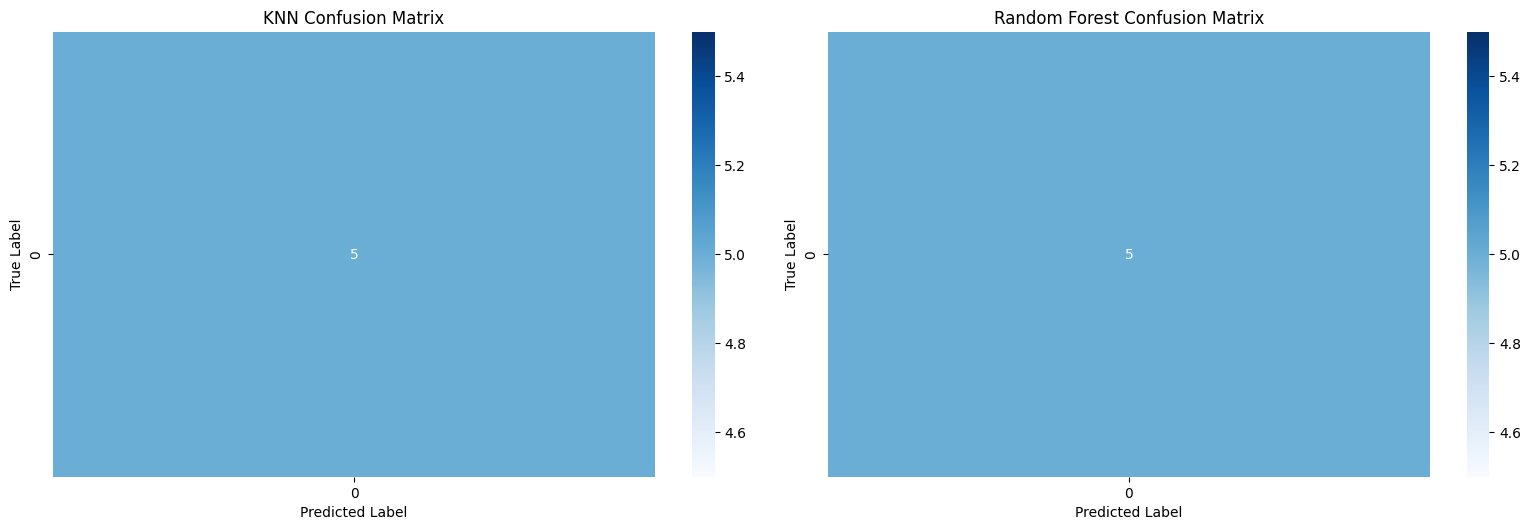

In [32]:
def visualize_results(X_val, X_test, y_val, y_test, knn, rf):
    """Use trained models for visualization"""
    plt.figure(figsize=(16, 10))
    
    classifiers_data = [
        ('KNN', knn.predict(X_test)),
        ('Random Forest', rf.predict(X_test))
    ]
    
    for i, (name, y_pred) in enumerate(classifiers_data, 1):
        # Confusion Matrix Subplot
        plt.subplot(2, 2, i)
        cm = confusion_matrix(y_test, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f'{name} Confusion Matrix')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        
        print(f"\n{name} Results:")
        # Use the respective model to predict validation data
        val_predictions = knn.predict(X_val) if name == 'KNN' else rf.predict(X_val)
        print("Validation Accuracy:", accuracy_score(y_val, val_predictions))
        print("Test Accuracy:", accuracy_score(y_test, y_pred))
        print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))
    
    plt.tight_layout()
    plt.show()

visualize_results(X_val_scaled, X_test_scaled, y_val, y_test, knn, rf)


Visualizing KNN predictions:
Test dataset path: /data_split\test
Number of image paths: 5
Number of y_test: 5
Number of y_pred: 5
Displaying 5 images for KNN
Image: daphne_21.jpeg | True: Daphne | Pred: Daphne
Image: daphne_25.jpeg | True: Daphne | Pred: Daphne
Image: daphne_37.jpeg | True: Daphne | Pred: Daphne
Image: daphne_45.jpeg | True: Daphne | Pred: Daphne
Image: daphne_50.jpeg | True: Daphne | Pred: Daphne


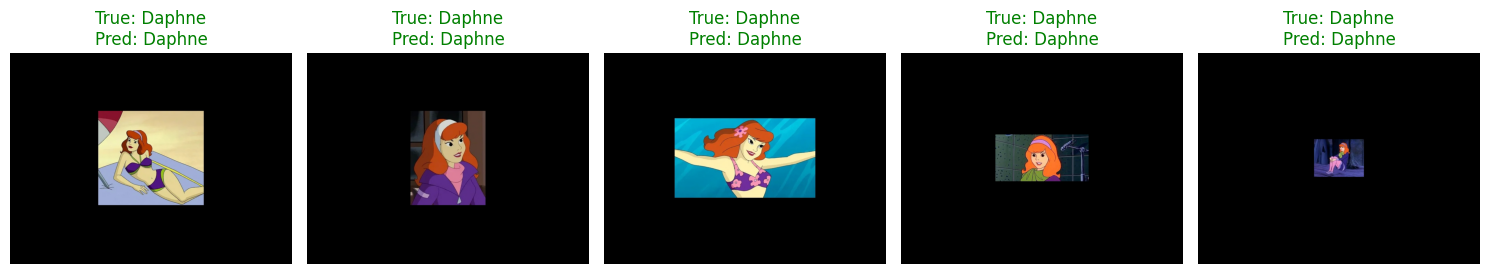


Visualizing Random Forest predictions:
Test dataset path: /data_split\test
Number of image paths: 5
Number of y_test: 5
Number of y_pred: 5
Displaying 5 images for Random Forest
Image: daphne_21.jpeg | True: Daphne | Pred: Daphne
Image: daphne_25.jpeg | True: Daphne | Pred: Daphne
Image: daphne_37.jpeg | True: Daphne | Pred: Daphne
Image: daphne_45.jpeg | True: Daphne | Pred: Daphne
Image: daphne_50.jpeg | True: Daphne | Pred: Daphne


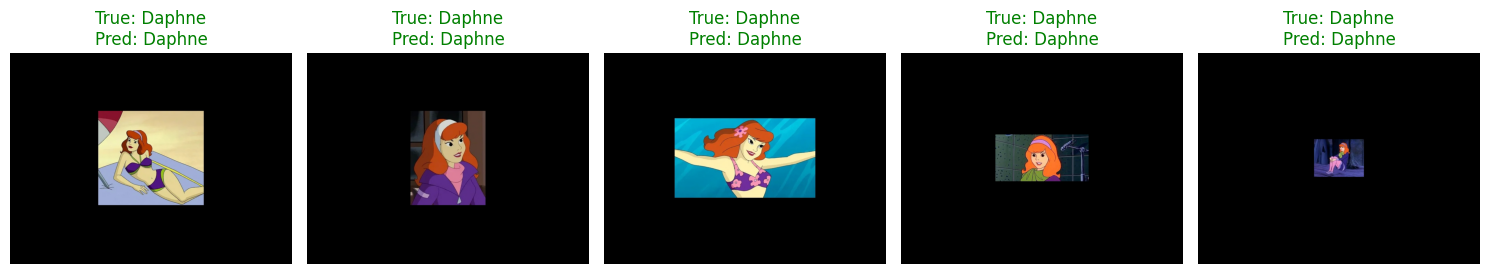

In [47]:
import os
import cv2
import matplotlib.pyplot as plt

def visualize_predictions(dataset_path, X_test, y_test, y_pred, model_name, num_images=5):
    """Visualize predictions along with true and predicted labels."""
    
    # Collect all image paths in the test set folder
    image_paths = []
    labels = []
    
    # Assuming your dataset is split into 'train' and 'test' subfolders
    test_dataset_path = os.path.join(dataset_path, 'test')  # Modify this if your path differs
    print(f"Test dataset path: {test_dataset_path}")
    
    for class_name in os.listdir(test_dataset_path):
        class_path = os.path.join(test_dataset_path, class_name)
        if os.path.isdir(class_path):
            for img_name in os.listdir(class_path):
                image_paths.append(os.path.join(class_path, img_name))
                labels.append(class_name)  # The directory name is the class label
    
    # Verify that the number of images is the same as y_test and y_pred
    print(f"Number of image paths: {len(image_paths)}")
    print(f"Number of y_test: {len(y_test)}")
    print(f"Number of y_pred: {len(y_pred)}")
    
    assert len(image_paths) == len(y_test) == len(y_pred), "Mismatch between images and labels"
    
    # Visualize the first few images with their true and predicted labels
    num_images = min(num_images, len(image_paths), len(y_test), len(y_pred))  # Limit to available number of images
    print(f"Displaying {num_images} images for {model_name}")

    plt.figure(figsize=(15, 5))  # Resize the figure to accommodate 5 images
    
    for i in range(num_images):  # Loop over the first `num_images` images
        img_path = image_paths[i]
        true_label = labels[i]
        pred_label = y_pred[i]
        
        # Read the image and convert from BGR to RGB for display
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        # Plot the image
        plt.subplot(1, num_images, i + 1)  # Adjust to display images in a single row
        plt.imshow(img)
        
        # Display the title with true and predicted labels
        plt.title(f'True: {true_label}\nPred: {pred_label}', color='red' if true_label != pred_label else 'green')
        plt.axis('off')
        
        # Print true vs predicted labels in the console
        print(f"Image: {os.path.basename(img_path)} | True: {true_label} | Pred: {pred_label}")
    
    plt.tight_layout()
    plt.show()

# Example usage
dataset_path = '/data_split'  # Ensure your dataset path is correct
print("\nVisualizing KNN predictions:")
visualize_predictions(dataset_path, X_test_scaled, y_test, knn.predict(X_test_scaled), model_name="KNN", num_images=5)  # Visualize KNN predictions

print("\nVisualizing Random Forest predictions:")
visualize_predictions(dataset_path, X_test_scaled, y_test, rf.predict(X_test_scaled), model_name="Random Forest", num_images=5)  # Visualize Random Forest predictions